In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [4]:
# loading claimants data 

claimants = pd.read_csv("C:\\Data science\\Data sets\\claimants.csv")

claimants.head(10)

##########################################################################

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


In [5]:
# Droping first column 
claimants.drop(["CASENUM"],inplace=True,axis = 1)

#cat_cols = ["ATTORNEY","CLMSEX","SEATBELT","CLMINSUR"]
#cont_cols = ["CLMAGE","LOSS"]
claimants.head(10)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
5,0,1.0,1.0,0.0,35.0,0.309
6,0,0.0,1.0,0.0,9.0,3.538
7,0,1.0,1.0,0.0,34.0,4.881
8,1,1.0,1.0,0.0,60.0,0.874
9,1,0.0,1.0,0.0,NaN,0.350


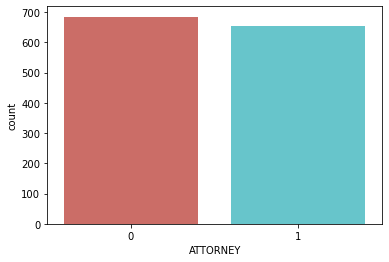

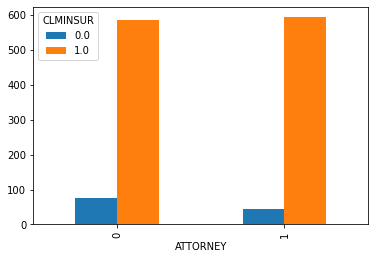

In [9]:
# Getting the barplot for the categorical columns 

sb.countplot(x="ATTORNEY",data=claimants,palette="hls")
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind="bar")


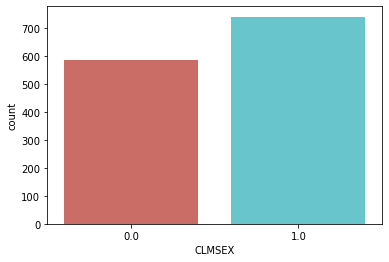

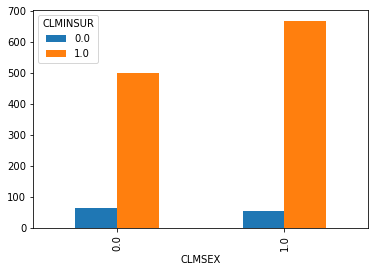

In [11]:

sb.countplot(x="CLMSEX",data=claimants,palette="hls")
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar")


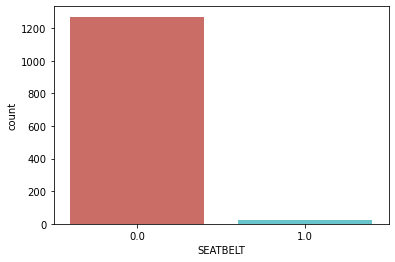

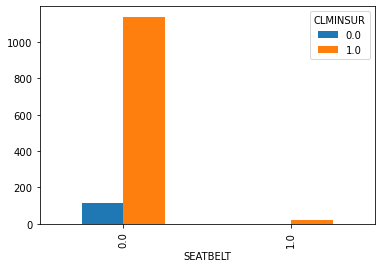

In [12]:
sb.countplot(x="SEATBELT",data=claimants,palette="hls")
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")


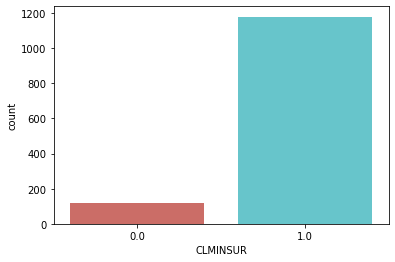

In [13]:

sb.countplot(x="CLMINSUR",data=claimants,palette="hls")


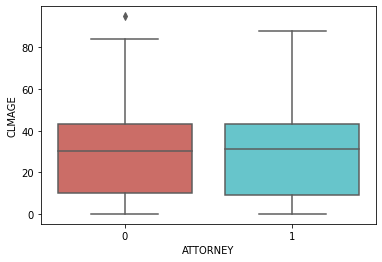

In [8]:

# Data Distribution - Boxplot of continuous variables wrt to each category of categorical columns

sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls")
# sb.boxplot(x="ATTORNEY",y="LOSS",data=claimants,palette="hls")
# sb.boxplot(x="CLMSEX",y="CLMAGE",data=claimants,palette="hls")
# sb.boxplot(x="CLMSEX",y="LOSS",data=claimants,palette="hls")
# sb.boxplot(x="SEATBELT",y="CLMAGE",data=claimants,palette="hls")
# sb.boxplot(x="SEATBELT",y="LOSS",data=claimants,palette="hls")
# sb.boxplot(x="CLMINSUR",y="CLMAGE",data=claimants,palette="hls")
# sb.boxplot(x="CLMINSUR",y="LOSS",data=claimants,palette="hls")


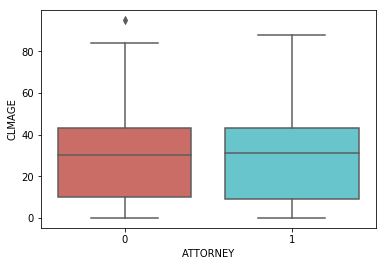

In [4]:
sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls")

In [9]:

# To get the count of null values in the data 

claimants.isnull().sum()


claimants.shape # 1340 6 => Before dropping null values

# To drop null values ( dropping rows)

claimants.dropna().shape # 1096 6 => After dropping null values



(1096, 7)

In [6]:
# Fill nan values with mode of the categorical column 

claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1

claimants["CLMINSUR"].fillna(1,inplace=True) # claimants.CLMINSUR.mode() = 1

claimants["SEATBELT"].fillna(0,inplace=True) # claimants.SEATBELT.mode() = 0

claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1




In [7]:
claimants.CLMAGE.fillna(28.4144,inplace=True) # claimants.CLMAGE.mean() = 28.4


In [8]:
# Model building 
from sklearn.linear_model import LogisticRegression

claimants.shape
X = claimants.iloc[:,[1,2,3,4,5]]
Y = claimants.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(X,Y)

classifier.coef_ # coefficients of features 
classifier.predict_proba (X) # Probability values 

y_pred = classifier.predict(X)
claimants["y_pred"] = y_pred
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([claimants,y_prob],axis=1)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)
type(y_pred)
accuracy = sum(Y==y_pred)/claimants.shape[0]
pd.crosstab(y_pred,Y)



NameError: name 'y_pred' is not defined

In [36]:
accuracy

0.7037313432835821